In [1]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Входные данные

Тип входного уравнение (например: explicit)

In [41]:
equation_type = str(input())

Ввод N - количество x > 0 (рекомендуется: 50)

In [42]:
N = int(input())

Ввод K - число t > 0 (рекомендуется: 100-500)

In [43]:
K = int(input())

Ввод T - номер шага > 0 (рекомендуется: 1)

In [44]:
T = int(input())

Вариант 7:
\begin{align}
    \frac {\partial^2{u}} {\partial{t^2}} + 2 \frac {\partial{u}} {\partial{t}}= \frac {\partial ^ 2 {u}} {\partial{x^2}} + 2 \frac {\partial{u}} {\partial{x}} - 3u, \\
U(0, t) = exp(-t) \cdot cos(2t), \\
U(\frac {\pi} {2}, t) = 0, \\
U(x, 0) = exp(-x) \cdot cos(x), \\
U_t(x, 0) = -exp(-x) \cdot cos(x)
\end{align}

Аналитическое решение:
\begin{align}
U(x, t) = exp(-t - x) \cdot cos(x) \cdot cos(2t)
\end{align}

In [45]:
params = {
        'a': 1,
        'b': 2,
        'c': -3,
        'd': 2,
        'l': np.pi / 2,
        'f': lambda: 0,
        'alpha': 1,
        'beta': 0,
        'gamma': 1,
        'delta': 0,
        'psi1': lambda x: np.exp(-x) * np.cos(x),
        'psi2': lambda x: -np.exp(-x) * np.cos(x),
        'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
        'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
        'phi0': lambda t: np.exp(-t) * np.cos(2 * t),
        'phi1': lambda t: 0,
        'bound_type': 'a1p2',
        'approximation': 'p1',
        'solution': lambda x, t: np.exp(-t - x) * np.cos(x) * np.cos(2 * t),
    }

Входной тип аппроксимации:
1. 2 балла первой степени
2. 2 балла второй степени
3. 3 балла второй степени

In [46]:
aprox = int(input())
if (aprox == 1):
    params['bound_type'] = 'a1p2'
elif (aprox == 2):
    params['bound_type'] = 'a2p2'
else:
    params['bound_type'] = 'a2p3'

In [47]:
solver = HyperbolicSolver(params, equation_type)

In [48]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [49]:
print("Sigma:", solver.sigma)

Sigma: 0.01621138938277404


In [50]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    surf = ax.plot_surface(x, t, z1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=15)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)
    # # Customize the z axis
    # ax.set_zlim(-1.01, 1.01)

    # # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

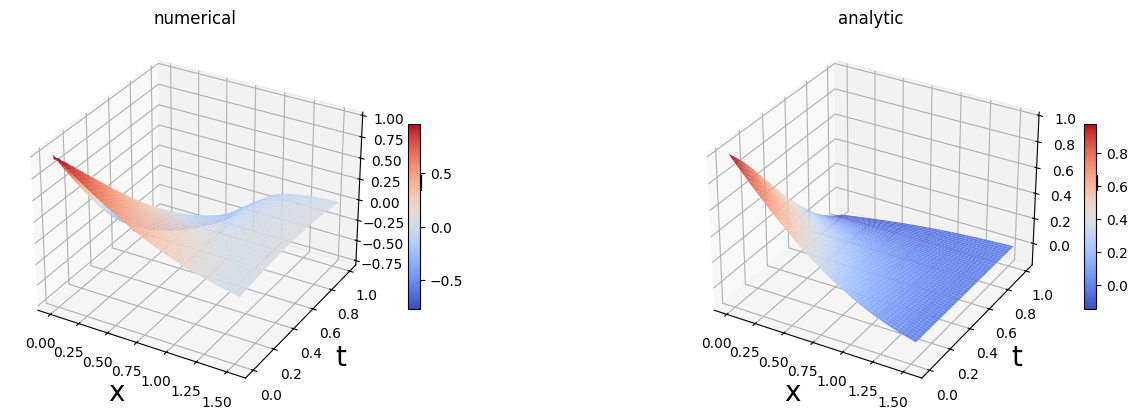

In [51]:
draw(dict_ans, N, K, T)

In [53]:
def draw_u_x(dict_, N, K, T, time, save_file="plot_u_x.png"):
    fig = plt.figure()
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    

    plt.title('U from x')
    plt.plot(x, z1[time], color='r', label='numerical')
    plt.plot(x, z2[time], color='b', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    error = compare_error(dict_ans)
    for i in range(len(error)):
        tmp = 0
        for j in error[i]:
            tmp += j
        err.append(tmp/len(error[i])/100)
    plt.title('Error from t')
    plt.plot(t, err, color='b', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

Проверка времени

In [66]:
curr_time = int(input())

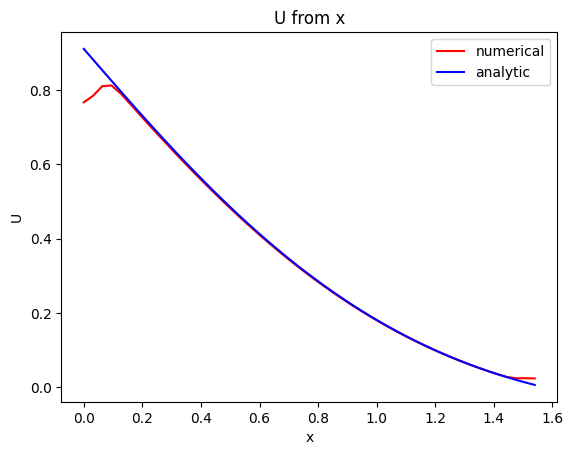

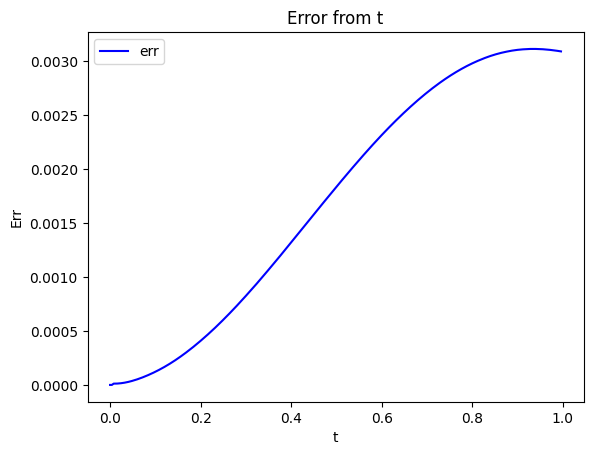

In [67]:
draw_u_x(dict_ans, N, K, T, curr_time)

In [56]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

Первые элементы в массиве ошибок:

In [57]:
print(error[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006738046726719376]


Средние элементы в массиве ошибок:

In [58]:
print(error[int(K/2)])

[0.5884830751721047, 0.5759024990859634, 0.5608411948988873, 0.5440730352267578, 0.5249691815982469, 0.5029796557861537, 0.48192297745914325, 0.45425062232718694, 0.42938813472228254, 0.402550795955531, 0.36817523822088766, 0.3384920284142967, 0.3109131728165267, 0.2732637961852129, 0.2289925416920063, 0.19089716287696074, 0.16509250163884787, 0.14933470256203646, 0.13906490150222306, 0.13111644941108017, 0.12403603040995587, 0.11731881791420817, 0.11082440639141983, 0.10452089919410389, 0.09840258174731847, 0.09246880668176852, 0.08671946148130039, 0.08115388692667472, 0.0757692602457056, 0.07055375047491341, 0.0654607641617183, 0.06033192835502621, 0.05472958262116148, 0.04773607657767821, 0.038089182702840944, 0.02525247285557876, 0.011027733216518544, 0.0009942497156312721, 0.009679404027856948, 0.018061609262798664, 0.027204631953515763, 0.03439994964208086, 0.04053316682806986, 0.04693988621871323, 0.051831420313270274, 0.056455777194216746, 0.06043732294490342, 0.063725948647039

Последние элементы в массиве ошибок:

In [59]:
print(error[-1])

[0.6074718921484482, 0.6168333178132672, 0.6240771772712308, 0.6293904295031311, 0.6327460139604263, 0.6340886793434781, 0.634205674540707, 0.6315132117083414, 0.6289011003532097, 0.6225267065331102, 0.6167755703036968, 0.6082128282921544, 0.5979297220213069, 0.5883557732519844, 0.5741447541926322, 0.560384464136092, 0.545056551242734, 0.5232849946677802, 0.500177295381268, 0.47282019604713943, 0.4370156833267256, 0.4012190441751304, 0.370970781902387, 0.34162043754126853, 0.3107534043522002, 0.28108768357663194, 0.2536018405469108, 0.22587003568156666, 0.1945010011333534, 0.15903255561857604, 0.12521310681042258, 0.09909795427386696, 0.07944550221084228, 0.06369173917172741, 0.052331654419738444, 0.04307480291297265, 0.03442000126837447, 0.027667543482951747, 0.021328103210338227, 0.015689878821928308, 0.01118436577956336, 0.006837160875241615, 0.00355949961884053, 0.0005859112576584273, 0.0016833515996407741, 0.0034697911879626227, 0.004778075253858424, 0.005589545954830442, 0.005994

In [60]:
print(f'Average error in each N: {avg_err}')

Average error in each N: 0.3150299167918613


In [61]:
print(f'Average error\t\t: {avg_err / K}')

Average error		: 0.0012601196671674453
